In [ ]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import collections

In [3]:
all_dict = {
    "multistage-EDM celeba": {},
    "EDM celeba": {},
    "dpm-solver cifar10": {},
    "multistage-dpm-solver cifar10": {},
    "separate-dpm-solver cifar10": {},
}

all_dict["multistage-EDM celeba"]['iteration'] = np.array([410547, 430094, 449648, 469195, 488750, 508297, 527844, 547398, 566945])

all_dict["multistage-EDM celeba"]['fid'] = np.array([
    [1.49584,1.55983,1.46209,1.5349,1.51263,1.45755,1.50117,1.49644,1.46637],
    [1.55243,1.49242,1.49827,1.53379,1.47738,1.47792,1.5073,1.47824,1.47223],
    [1.61918,1.442,1.53806,1.54873,1.44461,1.51199,1.52702,1.46157,1.49212],
])

all_dict["multistage-EDM celeba"]['fid_min'] = np.min(all_dict["multistage-EDM celeba"]['fid'], axis = 0)
all_dict["multistage-EDM celeba"]['fid_max'] = np.max(all_dict["multistage-EDM celeba"]['fid'], axis = 0)

all_dict["EDM celeba"]['iteration'] = np.array([410547, 430094, 449648, 469195, 488750, 508297, 527844, 547398, 566945])
all_dict["EDM celeba"]['fid'] = np.array([
    [1.84099,1.7867,1.74623,1.67117,1.65536,1.75034,1.74691,1.76053,1.73197],
    [1.81016,1.77944,1.70743,1.61947,1.77761,1.72583,1.77809,1.75472,1.72],
])

all_dict["EDM celeba"]['fid_min'] = np.min(all_dict["EDM celeba"]['fid'], axis = 0)
all_dict["EDM celeba"]['fid_max'] = np.max(all_dict["EDM celeba"]['fid'], axis = 0)


all_dict["dpm-solver cifar10"]['iteration'] = np.array([50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000])[3:]
all_dict["dpm-solver cifar10"]['fid'] = np.array([
    [9.137412,5.693188,4.2389207,3.3175156,3.1232443,3.0012522,2.8361616,2.749797,2.7916875],
    [9.322375,5.6449437,4.23705, 3.3844686, 3.117624, 2.928514, 2.8865507, 2.769615, 2.7669716],
    [9.205865,5.659993,4.1635613,3.359912,3.0962534,2.8948858,2.9003382,2.7348804,2.7333567]
])[:, 3:]

all_dict["dpm-solver cifar10"]['fid_min'] = np.min(all_dict["dpm-solver cifar10"]['fid'], axis = 0)
all_dict["dpm-solver cifar10"]['fid_max'] = np.max(all_dict["dpm-solver cifar10"]['fid'], axis = 0)


all_dict["multistage-dpm-solver cifar10"]['iteration'] = np.array([50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000])[3:]
all_dict["multistage-dpm-solver cifar10"]['fid'] = np.array([
    [14.6103525,6.512667,3.6836555,2.9737177,2.7378047,2.5854619,2.4732208,2.4352407,2.364089],
    [14.575738,6.7901278,3.6940858,2.9630654,2.7091715,2.5618348,2.4858801,2.4225574,2.3457587],
    [14.673683,6.8084235,3.6796665,2.9636245,2.745404,2.517057,2.4579887,2.4103866,2.4040089,]
])[:, 3:]

all_dict["multistage-dpm-solver cifar10"]['fid_min'] = np.min(all_dict["multistage-dpm-solver cifar10"]['fid'], axis = 0)
all_dict["multistage-dpm-solver cifar10"]['fid_max'] = np.max(all_dict["multistage-dpm-solver cifar10"]['fid'], axis = 0)


all_dict["separate-dpm-solver cifar10"]['iteration'] = np.array([50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000])[:3] * 3
all_dict["separate-dpm-solver cifar10"]['fid'] = np.array([
    [4.9274387,3.2863047,2.8919106,2.8412488,2.947834,3.0787997,3.2628849,3.4438505],
    [5.0315037,3.335317,2.87091,2.907785,2.997356,3.0317829,3.2166474,3.417479],
    [5.0405188,3.3080926,2.8802073,2.8782938,2.9631364,3.0343924,3.2194548,3.3739648]
])[:, :3]

all_dict["separate-dpm-solver cifar10"]['fid_min'] = np.min(all_dict["separate-dpm-solver cifar10"]['fid'], axis = 0)
all_dict["separate-dpm-solver cifar10"]['fid_max'] = np.max(all_dict["separate-dpm-solver cifar10"]['fid'], axis = 0)

In [44]:
np.array([
    [4.9274387,3.2863047,2.8919106,2.8412488,2.947834,3.0787997,3.2628849,3.4438505],
    [5.0315037,3.335317,2.87091,2.907785,2.997356,3.0317829,3.2166474,3.417479],
    [5.0405188,3.3080926,2.8802073,2.8782938,2.9631364,3.0343924,3.2194548,3.3739648]
])[:, :3]

array([[4.9274387, 3.2863047, 2.8919106],
       [5.0315037, 3.335317 , 2.87091  ],
       [5.0405188, 3.3080926, 2.8802073]])

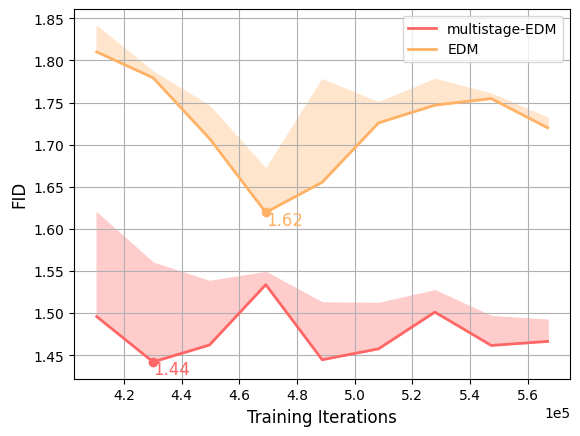

In [42]:
fig = plt.figure()
ax = plt.subplot(111)
offsetx = 0
offsety = 0.015
ax.plot(all_dict["multistage-EDM celeba"]['iteration'], all_dict["multistage-EDM celeba"]['fid_min'], linestyle='-', linewidth=2.0, color = tuple(np.array([255, 102, 102])/255), label='multistage-EDM')
ax.fill_between(all_dict["multistage-EDM celeba"]['iteration'], all_dict["multistage-EDM celeba"]['fid_min'], all_dict["multistage-EDM celeba"]['fid_max'], color = tuple(np.array([255, 204, 204])/255))
min_idx = np.argmin(all_dict["multistage-EDM celeba"]['fid_min'])
ax.plot(all_dict["multistage-EDM celeba"]['iteration'][min_idx],all_dict["multistage-EDM celeba"]['fid_min'][min_idx],'o', color = tuple(np.array([255, 102, 102])/255)) 

min_fid = all_dict["multistage-EDM celeba"]['fid_min'][min_idx]
s = f"{min_fid:.2f}"
ax.text(all_dict["multistage-EDM celeba"]['iteration'][min_idx] - offsetx,all_dict["multistage-EDM celeba"]['fid_min'][min_idx] - offsety , s, fontsize=12, color = tuple(np.array([255, 102, 102])/255))



ax.plot(all_dict["EDM celeba"]['iteration'], all_dict["EDM celeba"]['fid_min'], linestyle='-', linewidth=2.0, color = tuple(np.array([255, 178, 102])/255), label='EDM')
ax.fill_between(all_dict["EDM celeba"]['iteration'], all_dict["EDM celeba"]['fid_min'], all_dict["EDM celeba"]['fid_max'], color = tuple(np.array([255, 229, 204])/255))
min_idx = np.argmin(all_dict["EDM celeba"]['fid_min'])
ax.plot(all_dict["EDM celeba"]['iteration'][min_idx],all_dict["EDM celeba"]['fid_min'][min_idx],'o', color = tuple(np.array([255, 178, 102])/255)) 

min_fid = all_dict["EDM celeba"]['fid_min'][min_idx]
s = f"{min_fid:.2f}"
ax.text(all_dict["EDM celeba"]['iteration'][min_idx] - offsetx,all_dict["EDM celeba"]['fid_min'][min_idx] - offsety, s, fontsize=12, color = tuple(np.array([255, 178, 102])/255))

box = ax.get_position()
ax.ticklabel_format(style='sci', scilimits=(-1, 2), axis='x')
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.75))
# ax.legend(fontsize="14")
ax.legend()
# ax.set_xlim((0, 5e5))
# ax.set_ylim((2.5, 3.5))
# ax.set_ylim((2.4, 7.0))
ax.set_xlabel("Training Iterations", fontsize="12")
ax.set_ylabel("FID", fontsize="12")
ax.grid()
# plt.title(f"Analysis for interval {stage}")
plt.savefig(f"compare-EDM.png")

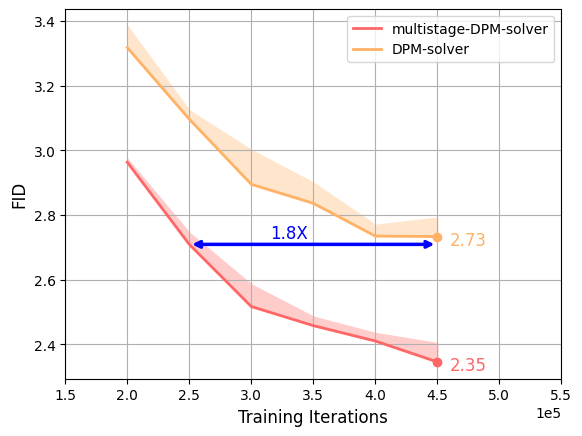

In [45]:
fig = plt.figure()
ax = plt.subplot(111)
offsetx = -0.1e5
offsety = 0.025
ax.plot(all_dict["multistage-dpm-solver cifar10"]['iteration'], all_dict["multistage-dpm-solver cifar10"]['fid_min'], linestyle='-', linewidth=2.0, color = tuple(np.array([255, 102, 102])/255), label='multistage-DPM-solver')
ax.fill_between(all_dict["multistage-dpm-solver cifar10"]['iteration'], all_dict["multistage-dpm-solver cifar10"]['fid_min'], all_dict["multistage-dpm-solver cifar10"]['fid_max'], color = tuple(np.array([255, 204, 204])/255))
min_idx = np.argmin(all_dict["multistage-dpm-solver cifar10"]['fid_min'])
ax.plot(all_dict["multistage-dpm-solver cifar10"]['iteration'][min_idx],all_dict["multistage-dpm-solver cifar10"]['fid_min'][min_idx],'o', color = tuple(np.array([255, 102, 102])/255)) 

min_fid = all_dict["multistage-dpm-solver cifar10"]['fid_min'][min_idx]
s = f"{min_fid:.2f}"
ax.text(all_dict["multistage-dpm-solver cifar10"]['iteration'][min_idx] - offsetx,all_dict["multistage-dpm-solver cifar10"]['fid_min'][min_idx] - offsety , s, fontsize=12, color = tuple(np.array([255, 102, 102])/255))



ax.plot(all_dict["dpm-solver cifar10"]['iteration'], all_dict["dpm-solver cifar10"]['fid_min'], linestyle='-', linewidth=2.0, color = tuple(np.array([255, 178, 102])/255), label='DPM-solver')
ax.fill_between(all_dict["dpm-solver cifar10"]['iteration'], all_dict["dpm-solver cifar10"]['fid_min'], all_dict["dpm-solver cifar10"]['fid_max'], color = tuple(np.array([255, 229, 204])/255))
min_idx = np.argmin(all_dict["dpm-solver cifar10"]['fid_min'])
ax.plot(all_dict["dpm-solver cifar10"]['iteration'][min_idx],all_dict["dpm-solver cifar10"]['fid_min'][min_idx],'o', color = tuple(np.array([255, 178, 102])/255)) 

min_fid = all_dict["dpm-solver cifar10"]['fid_min'][min_idx]
s = f"{min_fid:.2f}"
ax.text(all_dict["dpm-solver cifar10"]['iteration'][min_idx] - offsetx,all_dict["dpm-solver cifar10"]['fid_min'][min_idx] - offsety, s, fontsize=12, color = tuple(np.array([255, 178, 102])/255))

# ax.arrow(, 
#           - all_dict["multistage-dpm-solver cifar10"]['iteration'][1], 0,
#          width=0.01,
#          length_includes_head=True,
#          head_width = 0.25,
#          head_length = 1,
#          fc = 'r')

plt.annotate('', 
            xy=(all_dict["multistage-dpm-solver cifar10"]['iteration'][1], all_dict["multistage-dpm-solver cifar10"]['fid_min'][1]), 
            xytext=(all_dict["dpm-solver cifar10"]['iteration'][5] ,all_dict["multistage-dpm-solver cifar10"]['fid_min'][1]), 
            arrowprops=dict(arrowstyle='<->', color = 'blue', lw=2.5))
ax.text((all_dict["multistage-dpm-solver cifar10"]['iteration'][1] + all_dict["dpm-solver cifar10"]['iteration'][4])/2 -0.1e5,  
        all_dict["multistage-dpm-solver cifar10"]['fid_min'][1] + 0.02, "1.8X", fontsize=12, color = "blue")

box = ax.get_position()
ax.ticklabel_format(style='sci', scilimits=(-1, 2), axis='x')
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.75))
# ax.legend(fontsize="14")
ax.legend()
ax.set_xlim((1.5e5, 5.5e5))

# ax.set_ylim((2.4, 7.0))
ax.set_xlabel("Training Iterations", fontsize="12")
ax.set_ylabel("FID", fontsize="12")
ax.grid()
# plt.title(f"Analysis for interval {stage}")
plt.savefig(f"compare-dpm-solver.png")

/tmp/ipykernel_1691326/3177288728.py:67: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
/tmp/ipykernel_1691326/3177288728.py:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)


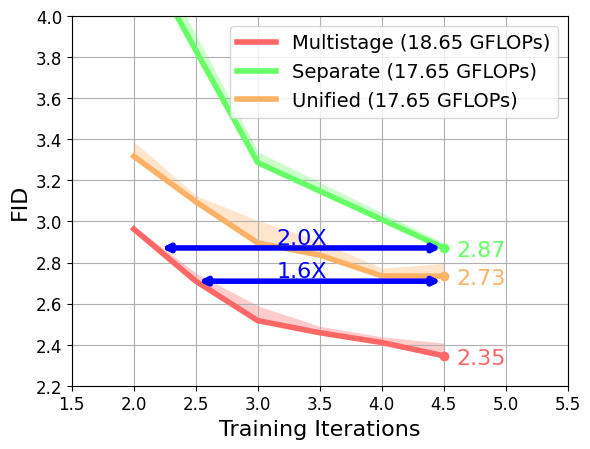

In [20]:
fig = plt.figure()
ax = plt.subplot(111)
offsetx = -0.1e5
offsety = 0.04
ax.plot(all_dict["multistage-dpm-solver cifar10"]['iteration'], all_dict["multistage-dpm-solver cifar10"]['fid_min'], linestyle='-', linewidth=4.0, color = tuple(np.array([255, 102, 102])/255), label='Multistage (18.65 GFLOPs)')
ax.fill_between(all_dict["multistage-dpm-solver cifar10"]['iteration'], all_dict["multistage-dpm-solver cifar10"]['fid_min'], all_dict["multistage-dpm-solver cifar10"]['fid_max'], color = tuple(np.array([255, 204, 204])/255))
min_idx = np.argmin(all_dict["multistage-dpm-solver cifar10"]['fid_min'])
ax.plot(all_dict["multistage-dpm-solver cifar10"]['iteration'][min_idx],all_dict["multistage-dpm-solver cifar10"]['fid_min'][min_idx],'o', color = tuple(np.array([255, 102, 102])/255)) 

min_fid = all_dict["multistage-dpm-solver cifar10"]['fid_min'][min_idx]
s = f"{min_fid:.2f}"
ax.text(all_dict["multistage-dpm-solver cifar10"]['iteration'][min_idx] - offsetx,all_dict["multistage-dpm-solver cifar10"]['fid_min'][min_idx] - offsety , s, fontsize=16, color = tuple(np.array([255, 102, 102])/255))


ax.plot(all_dict["separate-dpm-solver cifar10"]['iteration'], all_dict["separate-dpm-solver cifar10"]['fid_min'], linestyle='-', linewidth=4.0, color = tuple(np.array([102, 255, 102])/255), label='Separate (17.65 GFLOPs)')
ax.fill_between(all_dict["separate-dpm-solver cifar10"]['iteration'], all_dict["separate-dpm-solver cifar10"]['fid_min'], all_dict["separate-dpm-solver cifar10"]['fid_max'], color = tuple(np.array([204, 255, 204])/255))
min_idx = np.argmin(all_dict["separate-dpm-solver cifar10"]['fid_min'])
ax.plot(all_dict["separate-dpm-solver cifar10"]['iteration'][min_idx],all_dict["separate-dpm-solver cifar10"]['fid_min'][min_idx],'o', color = tuple(np.array([102, 255, 102])/255)) 

min_fid = all_dict["separate-dpm-solver cifar10"]['fid_min'][min_idx]
s = f"{min_fid:.2f}"
ax.text(all_dict["separate-dpm-solver cifar10"]['iteration'][min_idx] - offsetx,all_dict["separate-dpm-solver cifar10"]['fid_min'][min_idx] - offsety, s, fontsize=16, color = tuple(np.array([102, 255, 102])/255))

ax.plot(all_dict["dpm-solver cifar10"]['iteration'], all_dict["dpm-solver cifar10"]['fid_min'], linestyle='-', linewidth=4.0, color = tuple(np.array([255, 178, 102])/255), label='Unified (17.65 GFLOPs)')
ax.fill_between(all_dict["dpm-solver cifar10"]['iteration'], all_dict["dpm-solver cifar10"]['fid_min'], all_dict["dpm-solver cifar10"]['fid_max'], color = tuple(np.array([255, 229, 204])/255))
min_idx = np.argmin(all_dict["dpm-solver cifar10"]['fid_min'])
ax.plot(all_dict["dpm-solver cifar10"]['iteration'][min_idx],all_dict["dpm-solver cifar10"]['fid_min'][min_idx],'o', color = tuple(np.array([255, 178, 102])/255)) 

min_fid = all_dict["dpm-solver cifar10"]['fid_min'][min_idx]
s = f"{min_fid:.2f}"
ax.text(all_dict["dpm-solver cifar10"]['iteration'][min_idx] - offsetx,all_dict["dpm-solver cifar10"]['fid_min'][min_idx] - offsety, s, fontsize=16, color = tuple(np.array([255, 178, 102])/255))


# ax.arrow(, 
#           - all_dict["multistage-dpm-solver cifar10"]['iteration'][1], 0,
#          width=0.01,
#          length_includes_head=True,
#          head_width = 0.25,
#          head_length = 1,
#          fc = 'r')

plt.annotate('', 
            xy=(2.2e5, all_dict["separate-dpm-solver cifar10"]['fid_min'][2]), 
            xytext=(all_dict["separate-dpm-solver cifar10"]['iteration'][2] ,all_dict["separate-dpm-solver cifar10"]['fid_min'][2]), 
            arrowprops=dict(arrowstyle='<->', color = 'blue', lw=4.0))
ax.text((all_dict["multistage-dpm-solver cifar10"]['iteration'][1] + all_dict["dpm-solver cifar10"]['iteration'][4])/2 -0.1e5,  
        all_dict["separate-dpm-solver cifar10"]['fid_min'][2] + 0.02, "2.0X", fontsize=16, color = "blue")


plt.annotate('', 
            xy=(all_dict["multistage-dpm-solver cifar10"]['iteration'][1], all_dict["multistage-dpm-solver cifar10"]['fid_min'][1]), 
            xytext=(all_dict["dpm-solver cifar10"]['iteration'][5] ,all_dict["multistage-dpm-solver cifar10"]['fid_min'][1]), 
            arrowprops=dict(arrowstyle='<->', color = 'blue', lw=4.0))
ax.text((all_dict["multistage-dpm-solver cifar10"]['iteration'][1] + all_dict["dpm-solver cifar10"]['iteration'][4])/2 -0.1e5,  
        all_dict["multistage-dpm-solver cifar10"]['fid_min'][1] + 0.02, "1.6X", fontsize=16, color = "blue")

box = ax.get_position()
ax.ticklabel_format(style='sci', scilimits=(-1, 2), axis='x')
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.75))
ax.legend(fontsize="14")
# ax.legend()
ax.set_xlim((1.5e5, 5.5e5))

ax.set_ylim((2.2, 4.0))
ax.set_xlabel("Training Iterations", fontsize=16)
ax.set_ylabel("FID", fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
ax.grid()
# plt.title(f"Analysis for interval {stage}")
plt.savefig(f"teaser.png", dpi=300)